## Instructions
- See deadline on the course web page
- See examination rules on the course web page.
- This problem set is performed individually (collaboration is encouraged, but each individual must be able to explain all of his/her hand-in solutions).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [137]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Joel'  # string
student['Firstname']='Brou Boni' # string
student['CID']='joelaho'        # string
student['DOB-year']=1999         # four-digit integer
student['DOB-month']=5         # integer in the range [1, 12]
student['DOB-day']=11            # integer in the range [1, 31]

# 
# YOUR CODE HERE
# 

In [138]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 3
## Extra problems
### Learning from data [TIF285], Chalmers, Fall 2020

Last revised: 3-Oct-2020 by Christian Forssén [christian.forssen@chalmers.se]

In [139]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 6 (extra): Bayesian optimization
### (3 points)
*You should have solved problem 3 to get some acquaintance with Gaussian Processes before doing this problem.*

In [366]:
# Import modules
#
%matplotlib inline
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import GPy
from scipy.optimize import basinhopping,minimize, rosen, rosen_der


# Additional module import statements if needed
# 
# YOUR CODE HERE
# 

### A univariate minimization problem

Try to minimize the function
$$
f(x) = \sin(6 x) + 0.2 x^2 - 0.7 x
$$
on the interval $x \in [-5,5]$.

The aim is to find the position of the minimum $x^*$ to within $\pm 0.05$ under the constraint that we would like to make as few function evaluations as possible.

### Task 1: Using "standard" optimization methods

a. **Plot the true function and indicate the position of the minimum**
Save the position of the *global* minimum in the variable `xtrue_min` (with at least two significant decimals)

global minimum: x = 1.8317, f(x0) = -1.6112


array([1.8316815])

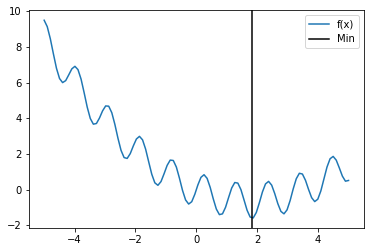

In [367]:

def f(x):
    return np.sin(6*x)+0.2*x**2-0.7*x
x= np.linspace(-5,5,100)
y=f(x)
x0=[1.]
plt.plot(x,y, label = 'f(x)')




func = lambda x: np.sin(6*x) +0.2*x**2-0.7*x
minimizer_kwargs = {"method": "Nelder-Mead"}
ret = basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs,
                   niter=200)
print("global minimum: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))
plt.axvline(x=ret.x, color ='black', label = 'Min')
plt.legend (loc='best')

xtrue_min=np.round(ret.x,7)
xtrue_min

b. Find the minimum using `scipy.optimize.minimize` with `method='Nelder-Mead'`. 
* Choose the starting point randomly from a uniform pdf $U(-5,5)$. 
* Repeat one hundred times. **Do you always get the same minimum?**
* More specifically, set the tolerance of the optimizer to `tol=0.01` and check for success by the criterion $|x^* - x^*_\mathrm{opt}| < 0.02$, where $x^*_\mathrm{opt}$ is the result from the optimizer.
* Be quantitative about the average number of function evaluations that are needed per successful optimization. Compute the ratio of the total number of function evaluations number (summed over the 100 tries with different starting points) with the number of successful attempts.  
  *Hint*: The number of function evaluations from a `scipy.optimize.minimize` result is returned in the ``OptimizeResult`` object. 

In [368]:
sample100=[]
sample = np.random.uniform(-5,5) 
#print(sample)
ntimes = 100
x_optstock=np.zeros(ntimes)
result = np.zeros(ntimes)
np.random.seed(2020)
succesStock=np.zeros(ntimes)
nfev=0
for i in range (ntimes):
    sample = np.random.uniform(-5,5) 
    sample100.append(sample)
    
for i in range (ntimes):
    res=sp.optimize.minimize(fun=func, x0=sample100[i], method="Nelder-Mead",tol=0.01)
    x_optstock[i] = res.x
    nfev+=res.nfev
    if (np.abs(xtrue_min-x_optstock[i])<0.02): 
        succesStock[i]=1
    else : 
        succesStock[i]=0
    #print(res.x)

np.sum(succesStock)

ratio = np.sum(succesStock)/nfev
print("the ratio equal to", ratio)


the ratio equal to 0.005921539600296077


### Task 2. Build your own BayesOpt algorithm

You will now implement a very different approach to minimize an objective function (this is a conventional name for the function that we are trying to minimize or maximize). The approach is known as **Bayesian optimization** and the basic idea is the following:
* Select a few random points, evaluate the unknown function at these samples and build a **statistical model** for the function output in the entire input range based on this data (usually a Gaussian Process model).
* Make a decision which point to sample next based on a so called **acquisition function** evaluated from the statistical model. This decision will incorporate our current knowledge about the function including our uncertainty for its value in different regions.
* Improve the statistical model using the new sample. Continue sampling new points according to the acquisition function.
* If done correctly, this approach will balance **exploration** of new regions (with uncertain outputs, that might contain the minimum) and **exploitation** of the region that is currently most promising.
* Very importantly, this method also works when you are dealing with **noisy objective functions**, i.e. when your "measurement" of its value at a new point in parameter space contains some random noise.

Your task is to repeat the above minimization with **your own Bayesian Optimization algorithm**, that should be assembled as described below. Bayesian optimization algoritms are built into libraries such as `Scikit-optimize` and `GPyOpt`, but we will build our own simple version using functions from `numpy`, `scipy`, and `GPy` (for building the statistical model).

The pseudo-code for BayesOpt is the following (see specific hints for your implementation at the end):
1. pick starting points $\mathbf{x}^{(1)},\mathbf{x}^{(2)},\ldots \mathbf{x}^{(k)}$, where $k \geq 2$
1. evaluate the objective function $f(\mathbf{x})$ to obtain $y^{(i)}=f(\mathbf{x}^{(i)})$ for $i=1,\ldots,k$
1. initialize a data vector $\mathcal{D}_k = \left\{(\mathbf{x}^{(i)},y^{(i)})\right\}_{i=1}^k$
1. select a statistical model for $f(\mathbf{x})$
1. **For** {$n=k+1,k+2,\ldots$}
   1.    select $\mathbf{x}^{(n)}$ by optimizing the acquisition function: $\mathbf{x}^{(n)} = \underset{\mathbf{x}}{\text{arg max}}\, \mathcal{A}(\mathbf{x}|\mathcal{D}_{n-1})$
   1.    evaluate the objective function to obtain $y^{(n)}=f(\mathbf{x}^{(n)})$
   1.    augment the data vector $\mathcal{D}_n = \left\{\mathcal{D}_{n-1} , (\mathbf{x}^{(n)},y^{(n)})\right\}$
   1.    update the statistical model for $f(\mathbf{x})$
1. **end for**

   Check for the minimum in the data vector that has been collected (note that it doesn't necessarily have to be the last sample).


**Hints:**
* You have to implement all steps in the above pseudo-code.
* You can try with $k=2$ starting points.
* For the statistical model you can use `GPy`. Follow the examples from the lectures and the exercise notebook.
* Any knowledge about the objective function should be built into the covariance function. Let us assume that we don't have much information and that we use a standard RBF kernel.
* It is recommended to constrain the RBF lengthscale so that it doesn't become unrealistic small. With the `GPy` model called `model`, such a constraint can be imposed using `model['rbf.lengthscale'].constrain_bounded(.1,10)`.
* Implement the so called Lower Confidence Bound (LCB) acquisition function for use in step 5A. Then, the acquisition function is simply: $\mathcal{A}(\boldsymbol{x}; | \mathcal{D}_{n-1}) = -\mu(\boldsymbol{x}) + \beta \sigma(\boldsymbol{x})$, where
  * $\mu(\boldsymbol{x})$ is the mean of the GP model trained with the data $\mathcal{D}_{n-1})$.
  * $\sigma(\boldsymbol{x})$ is the standard deviation of the GP model trained with the data $\mathcal{D}_{n-1})$.
  * $\beta$ is another hyperparameter for tuning the preference for exploring unknown regions. You can set $\beta = 2$.
* Remember that the statistical model has to be updated (the hyperparameters re-optimized) at step 5D.

#### Tasks
* Implement the BayesOpt minimizer
* Assume that you are allowed a total of 100 function evaluations ($k$ of them for the starting points and $100-k$ in the loop). Are you able to find the minimum to within $\pm 0.02$?
* Plot the final statistical model together with the true function. Show which points that have been explored.
* Plot also the convergence of the minimum value $\min(y_n)$ as a function of the iteration number $n \in \{1, \ldots, 100\}$.

reconstraining parameters GP_regression.rbf.lengthscale


GP_regression.,value,constraints,priors
rbf.variance,0.008079739482398311,+ve,
rbf.lengthscale,0.19623814574359308,"0.1,10.0",
Gaussian_noise.variance,0.1636191340809738,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x27a14eade48>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x27a14ead848>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x27a14d50488>]}

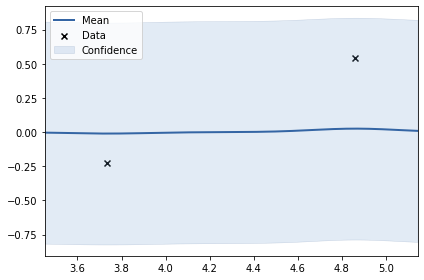

In [369]:
# Initialize the Bayesian Optimization by performing steps 1-4.
# You might want to try with different seeds.
sample100=[]
sample =0
#print(sample)
ntimes = 2
x_optstock=np.zeros(ntimes)
result = np.zeros(ntimes)
np.random.seed(2020)
succesStock=np.zeros(ntimes)
nfev=0
y=[]
dataStock=[]
beta = 2
for i in range (ntimes):
    sample = np.random.uniform(-5,5) 
    sample100.append(sample)
    

    
for i in range (ntimes):
    y.append(f(sample100[i]))
    dataStock.append([sample100[i],y]) #step3
    



x = np.array(sample100).reshape((-1,1))
y = np.array(y).reshape((-1,1))
#Step 4  ?  
kernel = GPy.kern.RBF(1,variance=1,lengthscale=1)
m = GPy.models.GPRegression(x,y,kernel)
m.optimize()
m['rbf.lengthscale'].constrain_bounded(.1,10)
display(m)
m.plot()




In [370]:


xdomain = np.linspace(-5,5,10000)
xdomain = np.array(xdomain).reshape((-1,1))
ydata=[]
xdata=[]
print(type(ydata))
for i in range(100-ntimes) : 
    
    mu, Var = m.predict(xdomain,full_cov=False)
    Interm = -mu + beta*np.sqrt(Var)   
    
    
    argmax= np.argmax(Interm)
    sample100.append(xdomain[argmax])
    
    
    y=y.tolist()
    y.append(f(xdomain[np.argmax(Interm)]))
    
    x = np.array(sample100).reshape((-1,1))
    y = np.array(y).reshape((-1,1))
    
    
    m = GPy.models.GPRegression(x,y,kernel)
    m['rbf.lengthscale'].constrain_bounded(.1,10)
    m.optimize()




reconstraining parameters GP_regression.rbf.lengthscale


<class 'list'>


reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.leng

GP_regression.,value,constraints,priors
rbf.variance,5.294090501084743,+ve,
rbf.lengthscale,0.10000000012218256,"0.1,10.0",
Gaussian_noise.variance,2.6397734391373464e-15,+ve,


Text(0, 0.5, 'Minimums')

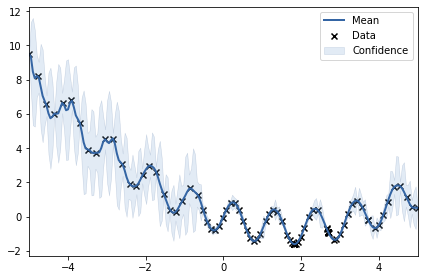

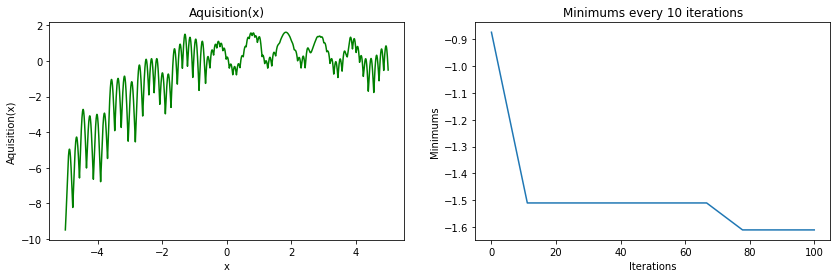

In [371]:
datastock=[]
m.plot(plot_limits=[-5,5])
minimums=[]
display(m)

fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].plot(xdomain,Interm,color='green')
ax[0].set_title('Aquisition(x)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Aquisition(x)')

for i in range (1,11):
    datastock.append(y[:i*10])

for i in range(10):
    minimums.append(min(datastock[i]))
    
xiter=np.linspace(0,100,10)
ax[1].plot(xiter,minimums)
ax[1].set_title('Minimums every 10 iterations')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Minimums')

## Problem 7 (extra): A simple Bayesian binary classifier
### (4 points)
*You should have solved problem 4 before doing this problem.*

In [146]:
# Import modules
#
%matplotlib inline
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
# importing modules
from sklearn import preprocessing
import random
from sklearn.model_selection import train_test_split
from scipy.stats import norm


#...
# 
# YOUR CODE HERE
# 

# Additional module import statements if needed
# 
# YOUR CODE HERE
# 

Create a bayesian binary classifier that can take $(E,|m|)$ as input data and predicts a binary label (0=below $T_c$, 1=above $T_c$). 
* Use only high- and low-tempterature data for training (so that predictions for intermediate temperature data should be more difficult). Use normalized data as in Task 4.
* The weights (and bias) of the single neuron binary classifier will be described by pdf:s that we will sample from using MCMC.
* Use a Gaussian prior on the two weights and the bias (with ``weight decay'' $\sigma = 1.0)$.
* Construct the (log) likelihood as in logistic regression (i.e. as used in Task 1). 
* Use, e.g., `emcee`, for the MCMC sampling.
* The prediction for a given input should be characterized by a pdf; i.e. the predicted probability for the state belonging to class 1 (above $T_c$) will itself be described by a pdf.

#### Sub-tasks
(a) Set up the training data

(b) Train the Bayesian binary classifier and plot the pdf:s for the weights and bias.

(c) Plot the decision boundaries for a few samples of the Bayesian binary classifier. Translate to an average decision boundary.

(d) Study in particular the **prediction** of your Bayesian binary classifier for inputs $(E,|m|)$ that corresponds to:
1. low-temperature configurations.
1. high-temperature configurations.
1. temperatures very close to the critical one.

In [232]:
# Read data
T, Es, Ms = np.loadtxt(f'{DATA_DIR}/problem4_data.dat',unpack=True)

input_data = np.column_stack((Es,Ms))

Tc = 2 / np.log(1+np.sqrt(2))
high_T = T>Tc

# High-temperature = 1
targets = high_T*np.ones_like(T)

**Subtask (a)**: Set up the training data
- Normalize the input data (mean=0, stddev=1)
- Use high- (T>3.5) and low-temperature (T<1.5) data for training. 
- Plot the training data, indicate the target output 1: T>Tc with red symbols and 0: T<Tc with blue symbols.


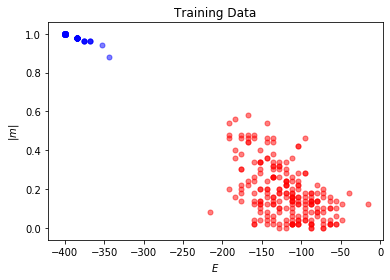

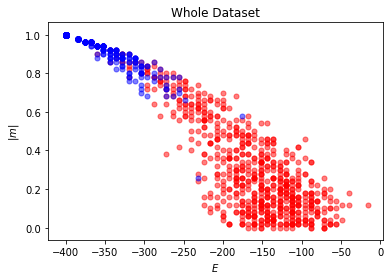

In [363]:
# 
# YOUR CODE HERE
# 
# Use high- (T>3.5) and low-temperature (T<1.5) data for training
e_scaled = preprocessing.scale(input_data[:,0]) #normalization
m_scaled = preprocessing.scale(input_data[:,1]) #normalization


input_scaled= np.column_stack((T,Es,Ms))
low_T = T<1.5
high_T = T>3.5

low_Tc = T<Tc
high_Tc = T>Tc

T_high=T[0:220]
T_low =T[1020:]
T_hl=np.concatenate([T_high,T_low])

with np.nditer(T_hl, op_flags=['readwrite']) as it:
    for x in it:
        if x<Tc:
            x[...]=0
            
        else:
            x[...]=1

E_M_high = input_scaled[high_T][:,1:]
E_M_low  = input_scaled[low_T][:,1:]
E_M=np.concatenate([E_M_high,E_M_low])

E_M_highTc = input_scaled[high_Tc][:,1:]
E_M_lowTc = input_scaled[low_Tc][:,1:]


#Data ok!


e_train,e_test,m_train,m_test,tl_train,tl_test= train_test_split(E_M[:,0],E_M[:,1],T_hl,train_size=0.7,test_size=0.3,random_state=42)

EMT_train=  np.column_stack((e_train,m_train,tl_train))
EMT_test=  np.column_stack((e_test,m_test,tl_test))
EM_train_2D=  np.column_stack((e_train,m_train))
EM_test_2D=  np.column_stack((e_test,m_test))
E_M=np.column_stack([E_M,T_hl])

fig, ax = plt.subplots(1,1)
ax.scatter(E_M_high[:,0],E_M_high[:,1],c='r',alpha=0.5,s=25)
ax.scatter(E_M_low[:,0],E_M_low[:,1],c='b',alpha=0.5,s=25)
ax.set_xlabel("$E$")
ax.set_ylabel("$|m|$");
ax.set_title("Training Data");

fig, ax = plt.subplots(1,1)
ax.scatter(E_M_highTc[:,0],E_M_highTc[:,1],c='r',alpha=0.5,s=25)
ax.scatter(E_M_lowTc[:,0],E_M_lowTc[:,1],c='b',alpha=0.5,s=25)
ax.set_xlabel("$E$")
ax.set_ylabel("$|m|$");
ax.set_title("Whole Dataset");

In [358]:
# Single neuron classifier code from Problem 4 is probably needed to implement the Bayesian neuron

# 
# YOUR CODE HERE
# 
# Create a sigmoid function and a single neuron
#
def sigmoid(a):
    '''Sigmoid function with input argument a that is the activation'''
    # 
    # YOUR CODE HERE
    # 
    return (1/(1+np.exp(-a)))

def single_neuron(x,w):
    """
    Single neuron prediction.
    
    Single output and N instances of k independent variables.
    
    Args:
        x (array[float]): input to the neuron. x.shape=(N,k) 
        w (array[float]): weights, w.shape=(k+1,)
            The zero index weight is the bias term.

    Returns:
        y (float): the output of the neuron
    """
    # 
    # YOUR CODE HERE
    # 
   
    m = len(x)
    x = np.c_[np.ones((m, 1)), x] 
    a = np.dot(x,w)
    return sigmoid(a)

In [359]:
# Define the log prior, likelihood, posterior
#
# 
# YOUR CODE HERE
# 

def log_prior(w):
    return -0.5*np.sum(np.square(w))


def log_likelyhood(w,x,t):
    m=len(t)
    w=w.T
    y=single_neuron(x,w)
    Cw=np.sum(t*np.log(y)+(1-t)*np.log(1-y))
    return Cw

def log_posterior(w,x,t):
    return (log_prior(w)+log_likelyhood(w,x,t))


**Sub-task (b)**: Train the Bayesian binary classifier and plot the pdf:s for the weights and bias.

In [360]:
ndim = 3
nwalkers =50
nsteps = 10000
w = np.random.rand(nwalkers,ndim)

x=EM_train_2D
t=tl_train.reshape(-1,1)

In [361]:
#After spending a lot of hours and checking every input and data, it simply does not work and we still didn't know why,
#the error is probability nan.
#It prevents us from going further,we could have use a single_neuron_classifier as in the basic part but this is not the goal of this problem...


sampler_Flat = emcee.EnsembleSampler(nwalkers, ndim, log_likelyhoodJO, args=(x,t))
#print(sampler_Flat)
#sampler_Flat.run_mcmc(w, nsteps,progress=True)
#samples = sampler_Flat.get_chain(discard=500, flat=True)

In [ ]:
w_extract=np.mean(samples,axis=0) #weight will be used in plot boundary!

**Sub-task (c)**: Plot the decision boundaries for a few samples of the Bayesian binary classifier. Translate to an average decision boundary.

In [352]:
# 
# YOUR CODE HERE
# 
def plot_decision_boundary3(pred, X, y,ax=[]):
    # Set min and max values and give it some padding
    x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    # Predict the function value for the whole gid
    Z = single_neuron(np.c_[xx0.ravel(), xx1.ravel()],w_extract)
    z_new = np.ones_like(Z)*(Z>0.25)
    z_new = z_new.reshape(xx0.shape)
    # Plot the contour and training examples
    if ax:
        ax.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.3)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    else:
        plt.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

def plot_decision_boundary2(pred, X, y,ax=[]):
    # Set min and max values and give it some padding
    x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    # Predict the function value for the whole gid
    Z = single_neuron(np.c_[xx0.ravel(), xx1.ravel()],w_extract)
    z_new = np.ones_like(Z)*(Z>0.5)
    z_new = z_new.reshape(xx0.shape)
    # Plot the contour and training examples
    if ax:
        ax.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.3)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    else:
        plt.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
        
def plot_decision_boundary3(pred, X, y,ax=[]):
    # Set min and max values and give it some padding
    x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    # Predict the function value for the whole gid
    Z = single_neuron(np.c_[xx0.ravel(), xx1.ravel()],w_extract)
    z_new = np.ones_like(Z)*(Z>0.75)
    z_new = z_new.reshape(xx0.shape)
    # Plot the contour and training examples
    if ax:
        ax.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.3)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    else:
        plt.contourf(xx0, xx1, z_new, cmap=plt.cm.RdBu, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)


In [ ]:
#Full dataset
T_pred_class = single_neuron(EM,w_extract)
copy_cl =T_pred_class.copy()
copy_cl=np.ones_like(copy_cl)*(copy_cl>0.5)

In [226]:
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(20,8))
fig.tight_layout

plot_decision_boundary2(copy_cl,EM_cla,targets,ax1)
ax1.set_ylabel(r'$|m|$');
ax1.set_title("25% decision boundary")

plot_decision_boundary(copy_cl,EM_cla,Tl,ax2)
ax2.set_xlabel(r'$E$')
ax2.set_title("50% decision boundary")

plot_decision_boundary3(copy_cl,EM_cla,Tl,ax3)
ax3.set_title("75% decision boundary");


**Sub-task (d)**: Study in particular the **prediction** of your Bayesian binary classifier for inputs $(E,|m|)$ that corresponds to:
1. low-temperature configurations.
1. high-temperature configurations.
1. temperatures very close to the critical one.